In [1]:
# Import the libraries needed to edit and plot data.

In [10]:
import pandas as d
import geopandas as gpd

In [19]:
# Upload the .geojson data file and establish the variable 'landfills.'

In [11]:
landfills = gpd.read_file('Methane_Producing_Landfills.geojson')

In [20]:
# Begin conducting data exploration. 
# Start by looking at the shape of the dataset.

In [21]:
landfills.shape

(646, 8)

In [23]:
# This tells me that in the dataset, there are 646 rows of data across 8 column categories.
# Next, I want to look at the type of data, and dataset information.

In [24]:
landfills.type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
641    Polygon
642    Polygon
643    Polygon
644    Polygon
645    Polygon
Length: 646, dtype: object

In [25]:
landfills.info

<bound method DataFrame.info of      OBJECTID SITE_NUM                                NAME     SHAPEAREA  \
0           2     2012                Russell Moe Landfill  2.165331e+06   
1           3     1949                Gladding McBean Dump  4.487916e+05   
2           4     1889           Cal Compact LF/Metro 2000  7.352565e+06   
3           5     1946                        General Tile  8.486350e+05   
4           6     1897                  Centinela Ave Dump  1.036129e+06   
..        ...      ...                                 ...           ...   
641      8645     3625                   R Big Continental  7.814160e+03   
642      8646     3626             Rancho Disposal Service  7.814172e+03   
643      8647     3627      Pomona Valley Transfer Station  7.814168e+03   
644      8648      274  City of Culver City (Waste Hauler)  7.814168e+03   
645      8649     3865                      H. M. Holloway  7.814168e+03   

         SHAPELEN          NUM SUP_DISTRICT  \
0     66

In [26]:
type(landfills)

geopandas.geodataframe.GeoDataFrame

In [27]:
# The above information tells me that the library can read and interpret the dataset.
# The data rows correspond with each location of each landfill within different supervisor districts in Los Angeles County. The spatial data under 'geometry'are polygons.
# I now want to see the data in a more readable format. I can pull the first five rows of data, last five rows of data, and a randomly generated sample of five rows of data.

In [29]:
landfills.head(5)

,OBJECTID,SITE_NUM,NAME,SHAPEAREA,SHAPELEN,NUM,SUP_DISTRICT,geometry
0,2,2012,Russell Moe Landfill,2.165331e+06,6624.595836,204-157-752,"3, 5","POLYGON ((-118.40271 34.29349, -118.40282 34.2..."
1,3,1949,Gladding McBean Dump,4.487916e+05,3035.853919,114-117-550,3,"POLYGON ((-118.47156 34.02893, -118.47225 34.0..."
2,4,1889,Cal Compact LF/Metro 2000,7.352565e+06,12231.683028,054-197-404,2,"POLYGON ((-118.27164 33.84618, -118.27179 33.8..."
3,5,1946,General Tile,8.486350e+05,3980.914743,084-157-446,2,"POLYGON ((-118.41062 33.92218, -118.41123 33.9..."
4,6,1897,Centinela Ave Dump,1.036129e+06,4192.380859,084-157-442,2,"POLYGON ((-118.37257 33.97973, -118.37286 33.9..."


In [31]:
landfills.tail(5)

,OBJECTID,SITE_NUM,NAME,SHAPEAREA,SHAPELEN,NUM,SUP_DISTRICT,geometry
641,8645,3625,R Big Continental,7814.160373,313.760521,None,3,"POLYGON ((-118.59319 34.24285, -118.59322 34.2..."
642,8646,3626,Rancho Disposal Service,7814.171696,313.760748,None,None,"POLYGON ((-117.48904 34.07459, -117.48906 34.0..."
643,8647,3627,Pomona Valley Transfer Station,7814.167756,313.760669,TS,1,"POLYGON ((-117.72853 34.05216, -117.72855 34.0..."
644,8648,274,City of Culver City (Waste Hauler),7814.167756,313.760669,None,2,"POLYGON ((-118.38859 34.01598, -118.38862 34.0..."
645,8649,3865,H. M. Holloway,7814.167833,313.760671,None,None,"POLYGON ((-119.77248 35.65796, -119.77251 35.6..."


In [32]:
landfills.sample(5)

,OBJECTID,SITE_NUM,NAME,SHAPEAREA,SHAPELEN,NUM,SUP_DISTRICT,geometry
608,7686,2759,Robert A. Nelson Transfer Station & Material R...,7814.169290,313.760700,None,None,"POLYGON ((-117.38316 34.02248, -117.38318 34.0..."
567,6721,2771,American Reclamation Chipping & Grinding,7814.168315,313.760680,None,1,"POLYGON ((-118.27784 34.15299, -118.27787 34.1..."
344,2934,231,"Arrow Disposal Services, Inc.",7814.172220,313.760759,None,1,"POLYGON ((-117.97960 34.03837, -117.97963 34.0..."
298,1933,2253,Martin Hallerman Dump,7814.168310,313.760680,054-197-919,2,"POLYGON ((-118.28043 33.85809, -118.28046 33.8..."
508,3215,171,City of Inglewood Transfer Station,7814.164570,313.760605,None,2,"POLYGON ((-118.35653 33.96757, -118.35656 33.9..."


In [33]:
# The above formatting helps me better visualize the landfill site number, name, corresponding supervisor's district, and location for plotting.
# I now want to count how many landfills are located per Los Angeles County district.

In [38]:
landfills['SUP_DISTRICT'].value_counts()

4       146
1       124
2       115
5       101
3        47
1, 5     10
3, 5      5
2, 4      4
1, 4      4
Name: SUP_DISTRICT, dtype: int64

In [39]:
# The above data tells me that:
# District 1 has 124 (plus 10) landfills. 
# District 2 has 115 (plus 4) landfills.
# District 3 has 47 (plus 5) landfills.
# District 4 has 146 (plus 8) landfills.
# District 5 has 101 (plus 5) landfills.

In [40]:
# Plot the dataset.

<AxesSubplot: >

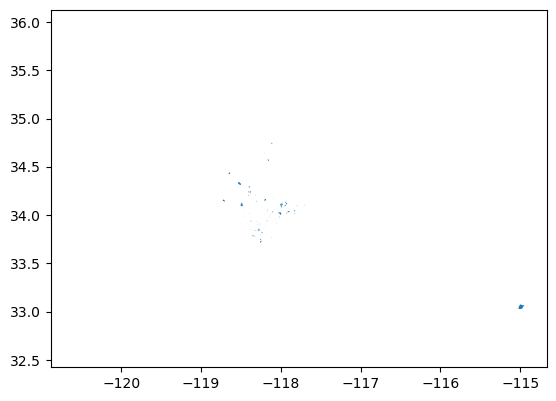

In [41]:
landfills.plot()

In [44]:
# I want to add some visual elements that can help make this data easier to interpret.
# I can start by adding a basemap.
# I want to use folium, but need to find a way to plot polygons (the example relies on averaged lat, lon coordinates).

# Resource! https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

In [19]:
import folium
import matplotlib.pyplot as plt

In [20]:
landfills.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
# The first code imports the folium library to help create the map.
# I assume the second code helps establish a way for folium to plot using polygons.
# Based on the resource I found, I need to determine what type of coordinate system this specific dataset uses.
# It looks like the geographic coordinate system is EPSG:4326

# I am running the code below based on the resource I found (link above). I am unclear of what this code does, but it seems like I can use it to establish a new variable that captures the original data using the designated geographic coordinate system. 

In [21]:
landfills_plot = landfills.to_crs(epsg=4326)
print(landfills_plot.crs)
landfills_plot.head()

epsg:4326


,OBJECTID,SITE_NUM,NAME,SHAPEAREA,SHAPELEN,NUM,SUP_DISTRICT,geometry
0,2,2012,Russell Moe Landfill,2.165331e+06,6624.595836,204-157-752,"3, 5","POLYGON ((-118.40271 34.29349, -118.40282 34.2..."
1,3,1949,Gladding McBean Dump,4.487916e+05,3035.853919,114-117-550,3,"POLYGON ((-118.47156 34.02893, -118.47225 34.0..."
2,4,1889,Cal Compact LF/Metro 2000,7.352565e+06,12231.683028,054-197-404,2,"POLYGON ((-118.27164 33.84618, -118.27179 33.8..."
3,5,1946,General Tile,8.486350e+05,3980.914743,084-157-446,2,"POLYGON ((-118.41062 33.92218, -118.41123 33.9..."
4,6,1897,Centinela Ave Dump,1.036129e+06,4192.380859,084-157-442,2,"POLYGON ((-118.37257 33.97973, -118.37286 33.9..."


In [22]:
m = folium.Map(location=[34.29,-118.40], zoom_start=10, tiles='CartoDB positron')
m

In [115]:
# The resource's code seemed to have created a base map, using the polygon points of the first row of data.
# The base map appears to represent part of Los Angeles County.
# I now want to add my dataset's polygons to the map above, and will use the resource's code.

In [23]:
for _, r in landfills.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    geo_j.add_to(m)
m

In [16]:
# Using the resource code above, the landfill data points seemed to have mapped across Los Angeles County. 
# I still have some trouble understanding how to plot, map, and customize polygons, but here's a first attempt!
# Based on the map above, it looks like landfills seem relatively evenly distributed but there are greater concentrations in parts of the Valley, South Bay, and East Los Angeles areas.
# It also appears that most of the clustered landfills are located near major roadways or freeways.

In [2]:
# Query the dataset to filter for only Supervisor District 2, representing the South Los Angeles region.

In [13]:
landfills.query("SUP_DISTRICT == '2'")

,OBJECTID,SITE_NUM,NAME,SHAPEAREA,SHAPELEN,NUM,SUP_DISTRICT,geometry
2,4,1889,Cal Compact LF/Metro 2000,7.352565e+06,12231.683028,054-197-404,2,"POLYGON ((-118.27164 33.84618, -118.27179 33.8..."
3,5,1946,General Tile,8.486350e+05,3980.914743,084-157-446,2,"POLYGON ((-118.41062 33.92218, -118.41123 33.9..."
4,6,1897,Centinela Ave Dump,1.036129e+06,4192.380859,084-157-442,2,"POLYGON ((-118.37257 33.97973, -118.37286 33.9..."
9,11,1963,Imperial Carson Mobile Home Park,1.083346e+06,5766.751087,024-197-360,2,"POLYGON ((-118.27281 33.83917, -118.27358 33.8..."
10,12,1965,Johns-Manville Co,8.973068e+06,12283.462803,024-197-340,2,"POLYGON ((-118.23059 33.82413, -118.23059 33.8..."
...,...,...,...,...,...,...,...,...
562,6405,2766,"GS Brothers, Inc.",7.814168e+03,313.760673,None,2,"POLYGON ((-118.28015 33.84674, -118.28018 33.8..."
565,6408,2769,"MB Landscaping and Nursery, Inc.",7.814172e+03,313.760748,None,2,"POLYGON ((-118.27663 33.85777, -118.27666 33.8..."
569,6723,2773,"Evergreen Recycling, Inc.",7.814164e+03,313.760598,None,2,"POLYGON ((-118.26809 33.95911, -118.26812 33.9..."
578,7048,2781,RJ's Chipping & Grinding Operation,7.814164e+03,313.760598,None,2,"POLYGON ((-118.33606 33.97461, -118.33609 33.9..."


In [15]:
# The above rows show a sample of what landfill sites are located in District 2. Based on this dataset, there are 115 sites within District 2.
# Previously, using 'value_count' I also learned that there are 4 more sites located in both Districts 2 and 4. I am not too sure how to capture that in the query above.
# Altogether, my assumption is that there are 119 out of 646 landfill sites concentrated across District 2.